This is just testing autodistill from Ultralytics to see if we could distill the yolo model using grounded-SAM. Due to time constraints, this model improvement method was left out. Tried incorporating grounded-SAM to autolabel some data to speed up the labeling process, however grounded-SAM created many duplicate bounding boxes (8+ per image when only one or two should be generated) so we scratched this idea.

Install Dependencies

In [ ]:
!pip install -q \
  autodistill \
  autodistill-grounded-sam \
  autodistill-yolov8 \
  roboflow \
  supervision==0.24.0

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.8/46.8 kB 4.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 158.2/158.2 kB 12.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 527.0/527.0 kB 38.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.2/85.2 kB 7.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.8/66.8 kB 4.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.9/49.9 MB 43.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 114.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 2.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 110.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 85.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 47.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2

Copy data and convert from .jpeg/.jpg to png. (Images will be much larger, not ideal, future code will use .jpg images for data.)

In [ ]:
!pip install Pillow

In [ ]:
import os
import shutil
from PIL import Image # Import the Image module from Pillow

def copy_convert_png(source_dir, target_dir):
    """
    Copies a dataset from source_dir to target_dir, maintaining the
    directory structure and converting .jpeg and .jpg files to .png

    Args:
        source_dir (str): Path to the source dataset directory.
        target_dir (str): Path to the destination directory.
    """
    if not os.path.exists(source_dir):
        print(f"Error: Source directory '{source_dir}' not found.")
        return

    print(f"Starting conversion and copy from '{source_dir}' to '{target_dir}'...")
    converted_count = 0
    copied_count = 0
    error_count = 0

    for root, dirs, files in os.walk(source_dir):
        relative_path = os.path.relpath(root, source_dir)
        target_root = os.path.join(target_dir, relative_path)

        # Create subdirectories in the target path if they don't exist
        if not os.path.exists(target_root):
            os.makedirs(target_root)
            print(f"Created directory: {target_root}") # Optional

        # Process each file in the current directory
        for filename in files:
            source_filepath = os.path.join(root, filename)
            base, ext = os.path.splitext(filename)
            ext_lower = ext.lower() # Work with lowercase extension

            # Check if it's a JPEG file
            if ext_lower == '.jpg' or ext_lower == '.jpeg' :
                target_filename = base + '.png'
                target_filepath = os.path.join(target_root, target_filename)
                print(f"  Converting: {filename} -> {target_filename}")
                # Save
                try:
                    with Image.open(source_filepath) as img:
                        # Ensure image loads and save as JPG
                        img.save(target_filepath, 'PNG')
                    converted_count += 1
                except Exception as e:
                    print(f"Error converting file {source_filepath} to {target_filepath}: {e}")
                    error_count += 1

            else:
                # If it's not a .jpg or .jpeg, copy directly
                target_filename = filename # Keep original filename
                target_filepath = os.path.join(target_root, target_filename)
                print(f"Copying non-JPEG: {filename}")
                try:
                    shutil.copy2(source_filepath, target_filepath)
                    copied_count += 1
                except Exception as e:
                    print(f"Error copying file {source_filepath} to {target_filepath}: {e}")
                    error_count += 1

    print("\nDataset conversion and copy complete.")
    print(f"Files converted to PNG: {converted_count}")
    print(f"Other files copied directly: {copied_count}")
    if error_count > 0:
        print(f"Errors encountered: {error_count}")

In [ ]:
source_dataset_path = '/content/dataset2'
destination_dataset_path = '/content/auto_dataset'

copy_convert_png(source_dataset_path, destination_dataset_path)

Starting conversion and copy from '/content/drive/MyDrive/Walmart_AI_Project/dataset' to '/content/auto_dataset'...
Created directory: /content/auto_dataset/.
Created directory: /content/auto_dataset/APPLES
  Converting: APPLES_MD_1.jpg -> APPLES_MD_1.png
  Converting: APPLES_MD_2.jpg -> APPLES_MD_2.png
  Converting: APPLES_MD_3.jpg -> APPLES_MD_3.png
  Converting: APPLES_MD_4.jpg -> APPLES_MD_4.png
  Converting: APPLES_MD_5.jpg -> APPLES_MD_5.png
  Converting: APPLES_MD_6.jpg -> APPLES_MD_6.png
  Converting: APPLES_MD_7.jpg -> APPLES_MD_7.png
  Converting: APPLES_MD_8.jpg -> APPLES_MD_8.png
  Converting: APPLES_MD_9.jpg -> APPLES_MD_9.png
  Converting: APPLES_MD_10.jpg -> APPLES_MD_10.png
  Converting: APPLES_MD_11.jpg -> APPLES_MD_11.png
  Converting: APPLES_MD_12.jpg -> APPLES_MD_12.png
  Converting: APPLES_MD_13.jpg -> APPLES_MD_13.png
  Converting: APPLES_MD_14.jpg -> APPLES_MD_14.png
  Converting: APPLES_MD_15.jpg -> APPLES_MD_15.png
  Converting: APPLES_MD_16.jpg -> APPLES_MD_16

KeyboardInterrupt: 

In [ ]:
source_zip_path = '/content/drive/MyDrive/Walmart_AI_Project/dataset2.zip'
destination_path = "/content/"
!cp "{source_zip_path}" "{destination_path}"

print(f"Copied '{source_zip_path}' to '{destination_path}'")

zip_file_name = "dataset2.zip"
zip_file_path = f"/content/{zip_file_name}"
destination_path = "/content/"
!unzip "{zip_file_path}" -d "{destination_path}"

print(f"Unzipped '{zip_file_path}' into '{destination_path}'")

Copied '/content/drive/MyDrive/Walmart_AI_Project/dataset2.zip' to '/content/'
Archive:  /content/dataset2.zip
   creating: /content/dataset2/
   creating: /content/dataset2/APPLES/
  inflating: /content/dataset2/APPLES/APPLES_MD_1.jpg  
  inflating: /content/dataset2/APPLES/APPLES_MD_10.jpg  
  inflating: /content/dataset2/APPLES/APPLES_MD_100.jpg  
  inflating: /content/dataset2/APPLES/APPLES_MD_101.jpg  
  inflating: /content/dataset2/APPLES/APPLES_MD_102.jpg  
  inflating: /content/dataset2/APPLES/APPLES_MD_103.jpg  
  inflating: /content/dataset2/APPLES/APPLES_MD_104.jpg  
  inflating: /content/dataset2/APPLES/APPLES_MD_105.jpg  
  inflating: /content/dataset2/APPLES/APPLES_MD_106.jpg  
  inflating: /content/dataset2/APPLES/APPLES_MD_107.jpg  
  inflating: /content/dataset2/APPLES/APPLES_MD_108.jpg  
  inflating: /content/dataset2/APPLES/APPLES_MD_109.jpg  
  inflating: /content/dataset2/APPLES/APPLES_MD_11.jpg  
  inflating: /content/dataset2/APPLES/APPLES_MD_110.jpg  
  inflatin

In [ ]:
source_dataset_path = '/content/auto_dataset'
destination_dataset_path = '/content/auto_dataset2'

copy_convert_jpg(source_dataset_path, destination_dataset_path)

Get class names from folders (Collected data, older version)

In [ ]:
import os

target_directory = '/content/auto_dataset2'

folder_names = []

if not os.path.exists(target_directory):
    print(f"Error: Directory '{target_directory}' not found.")
else:
    # Fetch all files/folders in directory
    for item_name in os.listdir(target_directory):
        item_path = os.path.join(target_directory, item_name)
        # Check if the item is a directory
        if os.path.isdir(item_path):
            folder_names.append(item_name)

print("Folders found:")
print(folder_names)

Folders found:
['RED_PEPPER', 'TOMATOES', 'LIMES', 'APPLES', 'ORANGE_PEPPER', 'AVOCADOS', 'LEMONS']


Create ontology map (maps semantic input for grounded SAM model with actual class labels for our dataset). This means for example if you tell groundedSAM to look for "red bell pepper" you can map the class label "red pepper" to that detection.

In [ ]:
# Create the ontology dictionary:
# Map descriptive text prompts (keys) to your desired class names (values).
# GroundedSAM uses these prompts to find the objects.
ontology_map = {}
for class_name in folder_names:
    # Convert to lowercase and replace underscores with spaces
    prompt = class_name.lower().replace('_', ' ')

    # Add the mapping to the dictionary {prompt: class_name}
    ontology_map[prompt] = class_name

print("Generated Ontology Map:")
print(ontology_map)

ontology_map['red bell pepper'] = ontology_map.pop('red pepper')
ontology_map['orange bell pepper'] = ontology_map.pop('orange pepper')

print(f"Ontology prompts: {list(ontology_map.keys())}")
print(f"Mapped classes: {list(ontology_map.values())}")

Generated Ontology Map:
{'red pepper': 'RED_PEPPER', 'tomatoes': 'TOMATOES', 'limes': 'LIMES', 'apples': 'APPLES', 'orange pepper': 'ORANGE_PEPPER', 'avocados': 'AVOCADOS', 'lemons': 'LEMONS'}
Ontology prompts: ['tomatoes', 'limes', 'apples', 'avocados', 'lemons', 'red bell pepper', 'orange bell pepper']
Mapped classes: ['TOMATOES', 'LIMES', 'APPLES', 'AVOCADOS', 'LEMONS', 'RED_PEPPER', 'ORANGE_PEPPER']


In [ ]:
del ontology_map['orange pepper']

In [ ]:
!pip install autodistill-utils

ERROR: Could not find a version that satisfies the requirement autodistill-utils (from versions: none)
ERROR: No matching distribution found for autodistill-utils


In [ ]:
!pip show autodistill autodistill-grounded-sam transformers torch groundingdino-py segment-anything supervision Pillow opencv-python

Name: autodistill
Version: 0.1.29
Summary: Distill large foundational models into smaller, domain-specific models for deployment
Home-page: https://github.com/autodistill/autodistill
Author: Roboflow
Author-email: autodistill@roboflow.com
License: 
Location: /usr/local/lib/python3.11/dist-packages
Requires: click, opencv-python, Pillow, PyYAML, supervision, tqdm
Required-by: autodistill-grounded-sam, autodistill-yolov8
---
Name: autodistill-grounded-sam
Version: 0.1.2
Summary: Automatically distill large foundational models into smaller, in-domain models for deployment
Home-page: https://github.com/autodistill/autodistill-grounded-sam
Author: Roboflow
Author-email: autodistill@roboflow.com
License: 
Location: /usr/local/lib/python3.11/dist-packages
Requires: autodistill, numpy, opencv-python, rf-groundingdino, rf-segment-anything, supervision, torch
Required-by: 
---
Name: transformers
Version: 4.51.1
Summary: State-of-the-art Machine Learning for JAX, PyTorch and TensorFlow
Home-page:

In [ ]:
!pip install -q --upgrade rf-groundingdino rf-segment-anything

Test GroundedSAM on sample image

trying to load grounding dino directly
final text_encoder_type: bert-base-uncased
Model initialized.

Prediction complete for: /content/auto_dataset2/APPLES/APPLES_MD_1.jpg
Number of detections: 8
Ontology classes: ['TOMATOES', 'LIMES', 'APPLES', 'AVOCADOS', 'LEMONS', 'RED_PEPPER', 'ORANGE_PEPPER']

--- Detected Classes and Confidences ---
- Class: TOMATOES             | Confidence: 0.5476
- Class: LIMES                | Confidence: 0.5216
- Class: APPLES               | Confidence: 0.5876
- Class: APPLES               | Confidence: 0.4400
- Class: AVOCADOS             | Confidence: 0.5072
- Class: LEMONS               | Confidence: 0.5087
- Class: RED_PEPPER           | Confidence: 0.5173
- Class: ORANGE_PEPPER        | Confidence: 0.5036
------------------------------------

Displaying annotated image...


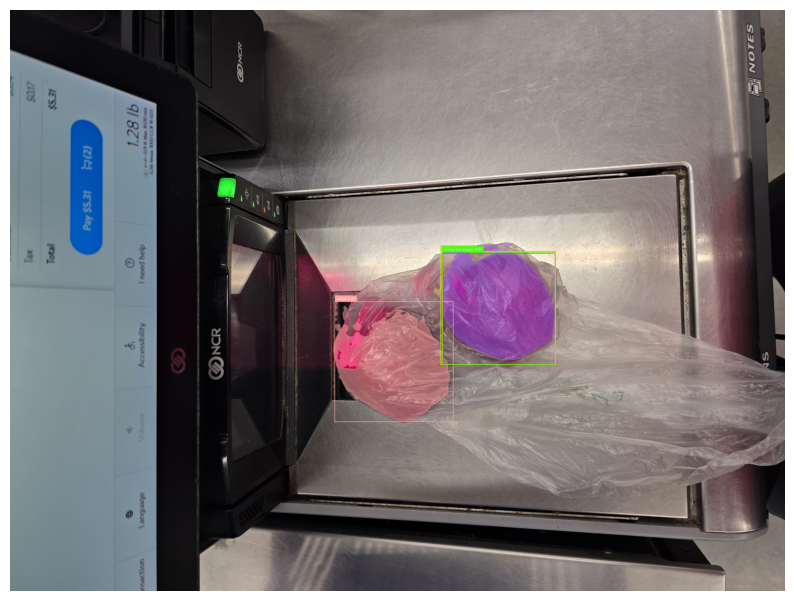

In [ ]:
from autodistill_grounded_sam import GroundedSAM
from autodistill.detection import CaptionOntology
from autodistill.utils import plot
import supervision as sv
from PIL import Image
import numpy as np
test_image_path = '/content/auto_dataset2/APPLES/APPLES_MD_1.jpg'

box_thresh = 0.4
text_thresh = 0.4

ontology = CaptionOntology(ontology_map)
base_model = GroundedSAM(
    ontology=ontology,
    box_threshold=box_thresh,
    text_threshold=text_thresh,
    )
print("Model initialized.")

image = None

if not os.path.exists(test_image_path):
      print("ERROR: Test image path does not exist!")
else:

      result = base_model.predict(test_image_path)

      print(f"\nPrediction complete for: {test_image_path}")

      print(f"Number of detections: {len(result)}")

      class_names = base_model.ontology.classes()
      print(f"Ontology classes: {class_names}") # Good to check this

      # List Detected Classes and Confidences
      if len(result) > 0:
          print("\n--- Detected Classes and Confidences ---")
          # Iterate through the detections using zip
          for class_id, confidence_score in zip(result.class_id, result.confidence):
              # Check if class_id is within the bounds of the class_names list
              if 0 <= class_id < len(class_names):
                  class_name = class_names[class_id]
                  print(f"- Class: {class_name:<20} | Confidence: {confidence_score:.4f}")
              else:
                  print(f"- Error: Detected class_id {class_id} is out of bounds for ontology classes (size {len(class_names)}).")
          print("------------------------------------")
      else:
          print("\nNo detections met the specified thresholds.")

      pil_image = Image.open(test_image_path)

      classes = list(ontology_map.keys())

      # Create labels for annotations
      labels = [
          f"{classes[class_id]} {confidence:0.2f}"
          for class_id, confidence
          in zip(result.class_id, result.confidence)
      ]

      # Initialize Annotators
      box_annotator = sv.BoxAnnotator()
      # Use MaskAnnotator for GroundedSAM results
      mask_annotator = sv.MaskAnnotator(opacity=0.5) # Adjust opacity as needed
      label_annotator = sv.LabelAnnotator()

      # Apply mask first
      annotated_image = mask_annotator.annotate(
          scene=pil_image.copy(),
          detections=result
      )
      # Apply bounding boxes
      annotated_image = box_annotator.annotate(
          scene=annotated_image, # Apply to the image with masks
          detections=result
      )
      # Apply labels
      annotated_image = label_annotator.annotate(
          scene=annotated_image, # Apply to the image with boxes and masks
          detections=result,
          labels=labels
      )

      # Display the image
      print("\nDisplaying annotated image...")
      sv.plot_image(annotated_image, size=(10, 10))


In [ ]:
import os
import glob
import supervision as sv
from tqdm import tqdm
import cv2
from autodistill_grounded_sam import GroundedSAM
from autodistill.detection import CaptionOntology

input_folder_path = '/content/auto_dataset2'
output_folder_path = '/content/auto_labeled_dataset'
image_extension = ".jpg"

ontology = CaptionOntology(ontology_map)
base_model = GroundedSAM(ontology=ontology)
print("Model initialized.")

image_paths = glob.glob(f"{input_folder_path}/**/*{image_extension}", recursive=True)

if not image_paths:
    print(f"Error: No files found with extension '{image_extension}' in '{input_folder_path}' or its subdirectories.")
else:
    print(f"Found {len(image_paths)} image files to process.")

    # Dictionary to store detections for each image
    all_detections = {}
    processed_image_paths = []

    # Loop through images and run predict
    for img_path in tqdm(image_paths, desc="Predicting images"):
        try:
            detections = base_model.predict(img_path, confidence=0.5)
            # Store detections using the image path as the key
            all_detections[img_path] = detections
            processed_image_paths.append(img_path)
        except Exception as e:
            print(f"Error predicting on {img_path}: {e}")

    print(f"\nPrediction complete for {len(all_detections)} images.")

    # CreateSupervision Dataset
    if all_detections:
        try:
            # Create the dataset object from the collected detections
            dataset = sv.DetectionDataset(
                classes=ontology.classes(),
                images=processed_image_paths,  # List of absolute paths
                annotations=all_detections     # Dict mapping absolute_path -> sv.Detections
            )
        except Exception as e:
            print(f"\nAn error occurred during dataset creation: {e}")
    else:
        print("\nNo detections were generated, cannot create dataset.")

trying to load grounding dino directly
final text_encoder_type: bert-base-uncased
Model initialized.
Found 320 image files to process.


Predicting images: 100%|██████████| 320/320 [24:10<00:00,  4.53s/it]


Prediction complete for 320 images.
Supervision dataset created with 320 entries.

An error occurred during dataset creation or saving: DetectionDataset.as_yolo() got an unexpected keyword argument 'output_dir'


In [ ]:
# Paths for images and labels
output_folder_path = '/content/autolabeled_dataset'
output_images_base_dir = os.path.join(output_folder_path, 'images')
output_labels_base_dir = os.path.join(output_folder_path, 'labels')
output_data_yaml_path = os.path.join(output_folder_path, "data.yaml")

# Create directories before calling .as_yolo()
os.makedirs(output_images_base_dir, exist_ok=True)
os.makedirs(output_labels_base_dir, exist_ok=True)
os.makedirs(output_folder_path, exist_ok=True)

print(f"Attempting to save dataset in YOLO format...")
print(f"Base Image Dir: {output_images_base_dir}")
print(f"Base Labels Dir: {output_labels_base_dir}")
print(f"YAML Path: {output_data_yaml_path}")

dataset.as_yolo(
    images_directory_path=output_images_base_dir,
    annotations_directory_path=output_labels_base_dir,
    data_yaml_path=output_data_yaml_path,
)

Attempting to save dataset in YOLO format...
  Base Image Dir: /content/autolabeled_split_dataset/images
  Base Labels Dir: /content/autolabeled_split_dataset/labels
  YAML Path: /content/autolabeled_split_dataset/data.yaml


KeyboardInterrupt: 

In [ ]:
# Split the dataset
train_ratio = 0.8
valid_ratio = 0.1
test_ratio = 0.1
if dataset:
    print(f"Splitting dataset (Train: {train_ratio}, Valid: {valid_ratio}, Test: {test_ratio})...")
    # First split into train and (valid + test)
    train_dataset, rest_dataset = dataset.split(
        split_ratio=train_ratio, random_state=42, shuffle=True
    )
    # Split the rest into valid and test
    if len(rest_dataset) > 0:
         # Calculate split ratio needed for valid vs test from the 'rest'
         valid_test_ratio = valid_ratio / (valid_ratio + test_ratio) if (valid_ratio + test_ratio) > 0 else 0
         valid_dataset, test_dataset = rest_dataset.split(
             split_ratio=valid_test_ratio, random_state=42, shuffle=True
         )
    else: # Handle case where rest_dataset might be empty
         valid_dataset = sv.DetectionDataset(classes=ontology.classes(), images=[], annotations={})
         test_dataset = sv.DetectionDataset(classes=ontology.classes(), images=[], annotations={})

    print(f"Split complete: Train({len(train_dataset)}), Valid({len(valid_dataset)}), Test({len(test_dataset)})")

Splitting dataset (Train: 0.8, Valid: 0.1, Test: 0.1)...
Split complete: Train(256), Valid(32), Test(32)


In [ ]:
!rm -rf autolabeled_split_dataset/

In [ ]:
output_folder_path = '/content/autolabeled_split_dataset'
train_images_dir = os.path.join(output_folder_path, 'train', 'images')
train_labels_dir = os.path.join(output_folder_path, 'train', 'labels')

valid_images_dir = os.path.join(output_folder_path, 'valid', 'images')
valid_labels_dir = os.path.join(output_folder_path, 'valid', 'labels')

test_images_dir = os.path.join(output_folder_path, 'test', 'images')
test_labels_dir = os.path.join(output_folder_path, 'test', 'labels')

data_yaml_path = os.path.join(output_folder_path, "data.yaml")

In [ ]:
print("Saving split datasets in YOLO format...")

# Save Training Set
os.makedirs(train_images_dir, exist_ok=True); os.makedirs(train_labels_dir, exist_ok=True)
if len(train_dataset) > 0:
    train_dataset.as_yolo(
        images_directory_path=train_images_dir,
        annotations_directory_path=train_labels_dir,
        data_yaml_path=None # Create the final yaml later
    )
print(f"  Saved training set ({len(train_dataset)} images).")

# Save Validation Set
os.makedirs(valid_images_dir, exist_ok=True); os.makedirs(valid_labels_dir, exist_ok=True)
if len(valid_dataset) > 0:
    valid_dataset.as_yolo(
        images_directory_path=valid_images_dir,
        annotations_directory_path=valid_labels_dir,
        data_yaml_path=None
    )
print(f"  Saved validation set ({len(valid_dataset)} images).")

# Save Test Set
os.makedirs(test_images_dir, exist_ok=True); os.makedirs(test_labels_dir, exist_ok=True)
if len(test_dataset) > 0:
    test_dataset.as_yolo(
        images_directory_path=test_images_dir,
        annotations_directory_path=test_labels_dir,
        data_yaml_path=None
    )
print(f"  Saved test set ({len(test_dataset)} images).")

Saving split datasets in YOLO format...
  Saved training set (256 images).
  Saved validation set (32 images).
  Saved test set (32 images).


In [ ]:
!pip install pyyaml

In [ ]:
import yaml
print(f"Creating data.yaml at {data_yaml_path}...")
yaml_content = {
    'train': os.path.abspath(train_images_dir),
    'val': os.path.abspath(valid_images_dir),
    'test': os.path.abspath(test_images_dir),
    'nc': len(ontology.classes()),
    'names': ontology.classes()
}
with open(data_yaml_path, 'w') as f:
    yaml.dump(yaml_content, f, sort_keys=False)

print(f"\nDataset saving process complete. Check folder: {output_folder_path}")

Creating data.yaml at /content/autolabeled_split_dataset/data.yaml...

Dataset saving process complete. Check folder: /content/autolabeled_split_dataset


In [ ]:
!zip -r autolabeled_split_dataset.zip /content/autolabeled_split_dataset/

  adding: content/autolabeled_split_dataset/ (stored 0%)
  adding: content/autolabeled_split_dataset/data.yaml (deflated 44%)
  adding: content/autolabeled_split_dataset/valid/ (stored 0%)
  adding: content/autolabeled_split_dataset/valid/images/ (stored 0%)
  adding: content/autolabeled_split_dataset/valid/images/AVOCADO_CART_EZ_4.png (deflated 0%)
  adding: content/autolabeled_split_dataset/valid/images/APPLES_MD_13.png (deflated 0%)
  adding: content/autolabeled_split_dataset/valid/images/BELLPEPPER_MD_31.png (deflated 0%)
  adding: content/autolabeled_split_dataset/valid/images/BELLPEPPER_MD_40.png (deflated 0%)
  adding: content/autolabeled_split_dataset/valid/images/BELLPEPPER_MD_34.png (deflated 0%)
  adding: content/autolabeled_split_dataset/valid/images/LIME_CART_MD_20.png (deflated 0%)
  adding: content/autolabeled_split_dataset/valid/images/APPLES_MD_22.png (deflated 0%)
  adding: content/autolabeled_split_dataset/valid/images/AVOCADO_CART_MD_3.png (deflated 0%)
  adding: co

In [ ]:
from google.colab import files
files.download('autolabeled_split_dataset.zip')

In [ ]:
!zip -r autolabeled_dataset.zip /content/autolabeled_dataset/

  adding: content/autolabeled_dataset/ (stored 0%)
  adding: content/autolabeled_dataset/data.yaml (deflated 15%)
  adding: content/autolabeled_dataset/images/ (stored 0%)
  adding: content/autolabeled_dataset/images/LEMON_SCALE_EZ_3.png (deflated 0%)
  adding: content/autolabeled_dataset/images/PEPPER_MD_6.png (deflated 0%)
  adding: content/autolabeled_dataset/images/TOMATO_MD_3.png (deflated 0%)
  adding: content/autolabeled_dataset/images/AVOCADO_CART_EZ_4.png (deflated 0%)
  adding: content/autolabeled_dataset/images/LEMON_SCALE_HD_3.png (deflated 0%)
  adding: content/autolabeled_dataset/images/AVOCADO_CART_EZ_2.png (deflated 0%)
  adding: content/autolabeled_dataset/images/TOMATO_MD_1.png (deflated 0%)
  adding: content/autolabeled_dataset/images/LIME_CART_MD_16.png (deflated 0%)
  adding: content/autolabeled_dataset/images/LEMON_CART_HD_4.png (deflated 0%)
  adding: content/autolabeled_dataset/images/PEPPER_MD_1.png (deflated 0%)
  adding: content/autolabeled_dataset/images/LIM

In [ ]:
from google.colab import files
files.download('autolabeled_dataset.zip')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>